In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from gc import collect as collect_garbage
from psutil import virtual_memory
from os import scandir

In [5]:
%matplotlib widget

In [2]:
# Load in the data
df = pd.read_csv("01-unfiltered-rr-intervals/unfiltered-rr-intervals_1.csv")

In [3]:
# How many <0.25 intervals are there?
sum( df["interval"] < 0.25 )

4644

In [4]:
# How many > 10 sec intervals (which we assume to be due to troughs or missing data) are there?
sum( df["interval"] > 10 )

80

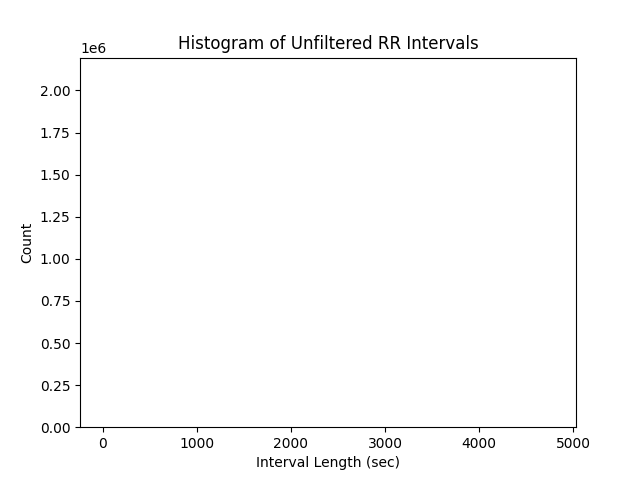

Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 1.25, 'type': 'set_device_pixel_ratio'}


In [6]:
# Let's look at a histogram of these intervals
fig = plt.figure()
plt.hist(df["interval"], bins=1000)
plt.xlabel("Interval Length (sec)")
plt.ylabel("Count")
plt.title("Histogram of Unfiltered RR Intervals")
plt.show()

In [9]:
# Let's filter these intervals rough and dirty and see what the distribution looks like then
filt = (df["interval"] >= 0.25) & (df["interval"] <= 10)
filtered_intervals = df["interval"].loc[filt]

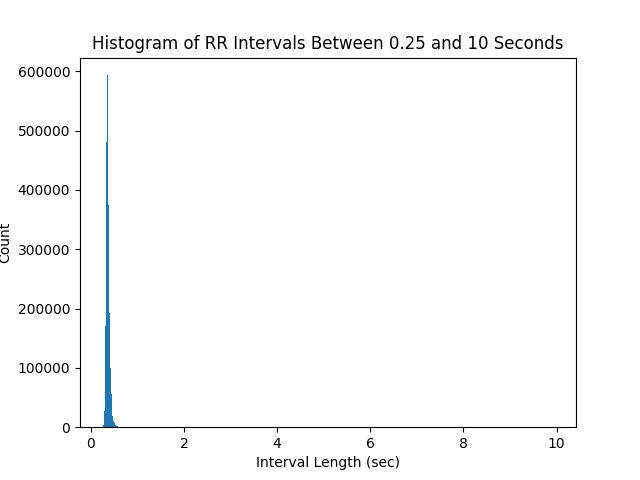

In [10]:
fig = plt.figure()
plt.hist(filtered_intervals, bins=500)
plt.xlabel("Interval Length (sec)")
plt.ylabel("Count")
plt.title("Histogram of RR Intervals Between 0.25 and 10 Seconds")
plt.show()